In [2]:
#%matplotlib inline
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import json

In [3]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
DIMENSION_E0 = len(df.at[0, 'one_hot_encode_forward'])
DIMENSION_E = len(df.at[0, 'energy_encode_start'])
df = df[2260:]
# df = df.iloc[list(range(574*2)) + list(range(2260,4396)), :]
df = df[df['migration_barriers'] < 1.1]
print(f'Dimensionality {DIMENSION_E0} {DIMENSION_E}')
df

Dimensionality 1521 42


,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end
2260,1130,Al,0.551454,-0.017951,0.560429,-914.514712,-914.532663,"[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[1356.0, 68.0, 82.0, 3.0, 7.0, 8.0, 690.0, 21...."
2261,1130,Al,0.569405,0.017951,0.560429,-914.532663,-914.514712,"[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[1356.0, 68.0, 82.0, 3.0, 7.0, 8.0, 690.0, 21....","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21...."
2262,1131,Zn,0.323667,-0.015743,0.331539,-914.514712,-914.530456,"[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[1358.0, 67.0, 78.0, 3.0, 9.0, 9.0, 690.0, 21...."
2263,1131,Zn,0.339410,0.015743,0.331539,-914.530456,-914.514712,"[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[1358.0, 67.0, 78.0, 3.0, 9.0, 9.0, 690.0, 21....","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21...."
2264,1132,Al,0.963559,-0.112681,1.019899,-914.191045,-914.303726,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[1354.0, 67.0, 85.0, 3.0, 7.0, 8.0, 690.0, 21...."
...,...,...,...,...,...,...,...,...,...,...,...
4391,2195,Al,0.195201,-0.050495,0.220449,-832.289776,-832.340271,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1066.0, 304.0, 0.0, 154.0, 0.0, 0.0, 548.0, 1...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1..."
4392,2196,Mg,0.189366,0.010789,0.183972,-832.340271,-832.329481,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1...","[1070.0, 302.0, 0.0, 152.0, 0.0, 0.0, 552.0, 1..."
4393,2196,Mg,0.178577,-0.010789,0.183972,-832.329481,-832.340271,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[1070.0, 302.0, 0.0, 152.0, 0.0, 0.0, 552.0, 1...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1..."
4394,2197,Al,0.993346,0.163984,0.911354,-832.340271,-832.176286,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1070.0, 300.0, 0.0, 154.0, 0.0, 0.0, 552.0, 1...","[1077.0, 293.0, 0.0, 154.0, 0.0, 0.0, 549.0, 1..."


In [4]:
# a,b = np.stack(df['one_hot_encode_forward']), np.stack(df['one_hot_encode_backward'])
# (a-b)[3,:]

In [5]:
# np.linalg.norm(a-b)

In [6]:
df = df.sample(frac=1)
df_copy = df.drop_duplicates(subset=['migration_atom', 'energy_start'])
# df_copy = df

In [7]:
# TEST_SIZE = 100

# x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

# df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

# x_train_Al, y_train_Al = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Mg, y_train_Mg = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Zn, y_train_Zn = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])


# x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

# x_test_Al, y_test_Al = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Mg, y_test_Mg = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Zn, y_test_Zn = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])

In [8]:
TEST_SIZE = 1000

x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

x_train_Al, y_train_Al = np.stack(df_train[df_train['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Al']['e0'])
x_train_Mg, y_train_Mg = np.stack(df_train[df_train['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Mg']['e0'])
x_train_Zn, y_train_Zn = np.stack(df_train[df_train['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Zn']['e0'])


x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

x_test_Al, y_test_Al = np.stack(df_test[df_test['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Al']['e0'])
x_test_Mg, y_test_Mg = np.stack(df_test[df_test['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Mg']['e0'])
x_test_Zn, y_test_Zn = np.stack(df_test[df_test['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Zn']['e0'])

In [9]:
print(x_train.shape)
print(x_train_Al.shape)
print(x_train_Mg.shape)
print(x_train_Zn.shape)

(654, 42)
(768, 1521)
(178, 1521)
(190, 1521)


In [10]:
mu_x_Al, mean_y_Al = np.mean(x_train_Al, axis=0), np.mean(y_train_Al)
mu_x_Mg, mean_y_Mg = np.mean(x_train_Mg, axis=0), np.mean(y_train_Mg)
mu_x_Zn, mean_y_Zn = np.mean(x_train_Zn, axis=0), np.mean(y_train_Zn)

covariance = np.cov(x_train, rowvar=False)
covariance_Al = np.cov(x_train_Al, rowvar=False)
covariance_Mg = np.cov(x_train_Mg, rowvar=False)
covariance_Zn = np.cov(x_train_Zn, rowvar=False)

U, S, Uh = np.linalg.svd(covariance)
U_Al, S_Al, Uh_Al = np.linalg.svd(covariance_Al)
U_Mg, S_Mg, Uh_Mg = np.linalg.svd(covariance_Mg)
U_Zn, S_Zn, Uh_Zn = np.linalg.svd(covariance_Zn)

PCS Dimensionality Reduction
2 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 95.23809523809523%
PCS Dimensionality Reduction
159 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 89.54635108481263%
PCS Dimensionality Reduction
98 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 93.5568704799474%
PCS Dimensionality Reduction
104 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 93.16239316239316%


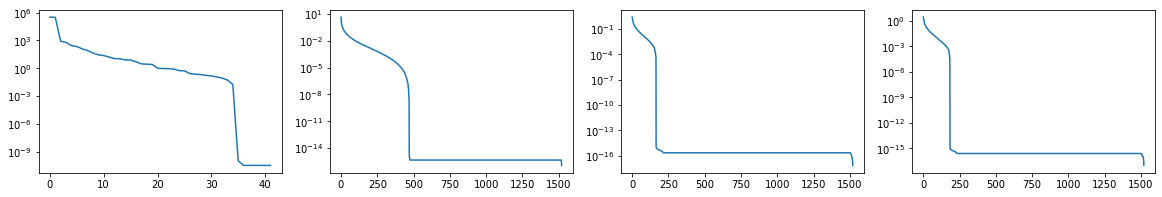

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))
axes[0].semilogy(np.arange(x_train.shape[1]), S)
axes[1].semilogy(np.arange(x_train_Al.shape[1]), S_Al)
axes[2].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg)
axes[3].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn)
##################################################################################################################
for S_it in (S, S_Al, S_Mg, S_Zn):
    sum_of_S = np.sum(S_it)
    PERCENT = 99
    for i in range(S_it.shape[0]):
        if np.sum(S_it[:i]) > PERCENT/100*sum_of_S:
            break
    print('PCS Dimensionality Reduction')
    print(i, f'principal components are needed to represent {PERCENT}% of the total variation')
    print(f'The percentage reduction in dimension is: {(S_it.shape[0]-i)/S_it.shape[0]*100}%')


In [12]:
NUM_FEATURES_1 = 42
NUM_FEATURES_2 = 150

In [13]:
x_train = x_train[:,:NUM_FEATURES_1]
x_test = x_test[:,:NUM_FEATURES_1]

In [14]:
x_train_Al, y_train_Al = (x_train_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_train_Al - mean_y_Al
x_test_Al, y_test_Al = (x_test_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_test_Al - mean_y_Al

x_train_Mg, y_train_Mg = (x_train_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_train_Mg - mean_y_Mg
x_test_Mg, y_test_Mg = (x_test_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_test_Mg - mean_y_Mg

x_train_Zn, y_train_Zn = (x_train_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_train_Zn - mean_y_Zn
x_test_Zn, y_test_Zn = (x_test_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_test_Zn - mean_y_Zn

In [15]:
lamd = 0.05
lamd_Al = 0.1
lamd_Mg = 0.1
lamd_Zn = 0.1

theta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + lamd * np.identity(NUM_FEATURES_1)),
               x_train.T).dot(y_train)

theta_Al = np.dot(np.linalg.inv(np.dot(x_train_Al.T, x_train_Al) + lamd_Al * np.identity(NUM_FEATURES_2)),
                  x_train_Al.T).dot(y_train_Al)

theta_Mg = np.dot(np.linalg.inv(np.dot(x_train_Mg.T, x_train_Mg) + lamd_Mg * np.identity(NUM_FEATURES_2)),
                  x_train_Mg.T).dot(y_train_Mg)

theta_Zn = np.dot(np.linalg.inv(np.dot(x_train_Zn.T, x_train_Zn) + lamd_Zn * np.identity(NUM_FEATURES_2)),
                  x_train_Zn.T).dot(y_train_Zn)

In [16]:
def pred_energy_ls(row):
    return np.inner(theta, np.asarray(row['energy_encode_start'])[:NUM_FEATURES_1])

def pred_e0_ls(row):
    if row['migration_atom'] == 'Al':
        return (np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2]))+
               np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2])))/2  + mean_y_Al
    elif row['migration_atom'] == 'Mg':
        return (np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2]))+
               np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2])))/2 + mean_y_Mg
    elif row['migration_atom'] == 'Zn':
        return (np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2]))+
               np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2])))/2  + mean_y_Zn
    else:
        raise RuntimeError('Unknown element')
        
def pred_de_ls(row):
    return np.inner(theta, np.asarray(row['energy_encode_end'])[:NUM_FEATURES_1]) - np.inner(theta, np.asarray(row['energy_encode_start'])[:NUM_FEATURES_1])

        
def pred_barrier_ls(row):
    return row['predicted_e0'] + 0.5*(row['predicted_de'])
                                                                                                               
df['predicted_energy'] = df.apply(lambda row: pred_energy_ls(row), axis=1)
df_train['predicted_energy'] = df_train.apply(lambda row: pred_energy_ls(row), axis=1)
df_test['predicted_energy'] = df_test.apply(lambda row: pred_energy_ls(row), axis=1)


df['predicted_e0'] = df.apply(lambda row: pred_e0_ls(row), axis=1)
df_train['predicted_e0'] = df_train.apply(lambda row: pred_e0_ls(row), axis=1)
df_test['predicted_e0'] = df_test.apply(lambda row: pred_e0_ls(row), axis=1)

df['predicted_de'] = df.apply(lambda row: pred_de_ls(row), axis=1)
df_train['predicted_de'] = df_train.apply(lambda row: pred_de_ls(row), axis=1)
df_test['predicted_de'] = df_test.apply(lambda row: pred_de_ls(row), axis=1)


df['predicted_barrier'] = df['e0'] + 0.5*df['predicted_de']
df_train['predicted_barrier'] = df_train['e0'] + 0.5*df_train['predicted_de']
df_test['predicted_barrier'] = df_test['e0'] + 0.5*df_test['predicted_de']

In [17]:
theta.shape

(42,)

In [18]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,predicted_energy,predicted_e0,predicted_de,predicted_barrier
2261,1130,Al,0.569405,0.017951,0.560429,-914.532663,-914.514712,"[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[1356.0, 68.0, 82.0, 3.0, 7.0, 8.0, 690.0, 21....","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....",-915.271401,0.510017,-0.049866,0.535496
2539,1269,Zn,0.321698,0.143401,0.249997,-937.276965,-937.133565,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1430.0, 83.0, 10.0, 0.0, 1.0, 0.0, 726.0, 21....","[1430.0, 83.0, 11.0, 0.0, 0.0, 0.0, 726.0, 21....",-937.434428,0.246777,0.176177,0.338086
2697,1348,Al,0.424729,-0.059253,0.454356,-934.427528,-934.486780,"[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1430.0, 0.0, 94.0, 0.0, 0.0, 0.0, 726.0, 0.0,...","[1432.0, 0.0, 92.0, 0.0, 0.0, 0.0, 726.0, 0.0,...",-934.212071,0.473599,-0.091021,0.408845
4364,2182,Al,0.569456,-0.004965,0.571939,-934.512660,-934.517625,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1437.0, 0.0, 78.0, 0.0, 0.0, 9.0, 722.0, 0.0,...","[1437.0, 0.0, 78.0, 0.0, 0.0, 9.0, 723.0, 0.0,...",-934.349279,0.561383,-0.059492,0.542193
4120,2060,Al,0.432233,-0.182339,0.523403,-898.620967,-898.803306,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 1.0, 0.0, 0...","[1323.0, 48.0, 81.0, 19.0, 43.0, 10.0, 656.0, ...","[1322.0, 50.0, 80.0, 19.0, 43.0, 10.0, 654.0, ...",-898.989730,0.469003,-0.104084,0.471361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,1468,Al,0.830088,0.055698,0.802239,-914.441177,-914.385480,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1353.0, 38.0, 115.0, 1.0, 6.0, 11.0, 687.0, 1...","[1352.0, 38.0, 116.0, 1.0, 6.0, 11.0, 687.0, 1...",-914.363605,0.774583,-0.029196,0.787640
3709,1854,Al,0.209815,-0.114629,0.267130,-881.242100,-881.356729,"[0.75, 0.25, 0.0, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[0.75, 0.25, 0.0, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[1201.0, 240.0, 35.0, 35.0, 13.0, 0.0, 604.0, ...","[1205.0, 237.0, 34.0, 35.0, 13.0, 0.0, 605.0, ...",-881.316604,0.357376,-0.047868,0.243195
2609,1304,Al,0.628326,0.000788,0.627932,-935.868612,-935.867824,"[0.75, 0.25, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.25, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1429.0, 47.0, 48.0, 0.0, 0.0, 0.0, 726.0, 12....","[1430.0, 46.0, 48.0, 0.0, 0.0, 0.0, 726.0, 12....",-935.769625,0.615537,-0.006426,0.624719
3640,1820,Zn,0.039623,-0.069835,0.074540,-871.611701,-871.681536,"[0.75, 0.0, 0.25, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.75, 0.0, 0.25, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1202.0, 0.0, 275.0, 0.0, 0.0, 47.0, 607.0, 0....","[1202.0, 0.0, 278.0, 0.0, 0.0, 44.0, 607.0, 0....",-871.654740,0.053760,-0.057506,0.045787


rmse train 0.19863621835206505
rmse test 0.19842518766067008


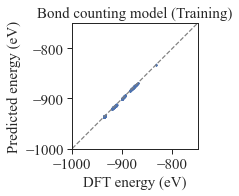

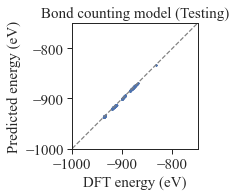

In [19]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted energy (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Training)')
    ax.set_xlabel(xlabel='DFT energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-1000, -700, 100), yticks=np.arange(-1000, -700, 100))
    ax.set_aspect('equal', 'box')
    
g.despine(top=False, right=False)
g.set_titles('')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['energy_start'], df_train['predicted_energy'])))
##################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted energy (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-1000, -700, 100), yticks=np.arange(-1000, -700, 100))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles('')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['energy_start'], df_test['predicted_energy'])))

rmse train 0.10377601589902494
rmse test 0.09978470732239277


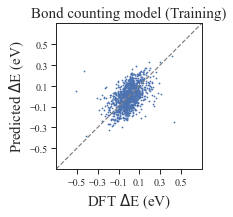

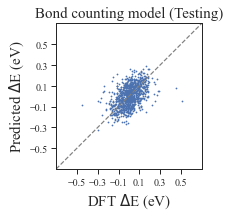

In [20]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 10, 'ytick.labelsize': 10, })

lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\Delta$E (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Training)')
    ax.set_xlabel(xlabel='DFT $\Delta$E (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.5, 0.7, 0.2), yticks=np.arange(-0.5, 0.7, 0.2))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['energy_difference'], df_train['predicted_de'])))
###################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 10, 'ytick.labelsize': 10, })

lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\Delta$E (eV)')
for ax in g.axes.flat:
    ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\Delta$E (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.5, 0.7, 0.2), yticks=np.arange(-0.5, 0.7, 0.2))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['energy_difference'], df_test['predicted_de'])))

rmse train 0.025366886677224264
rmse test 0.043629614479460704


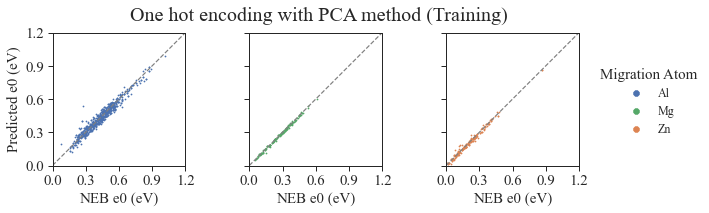

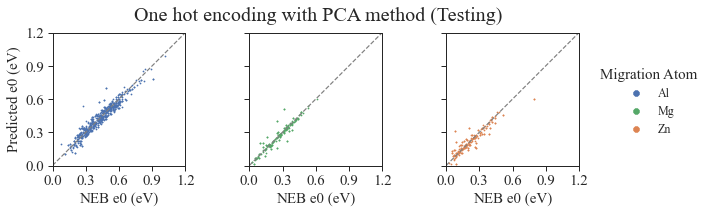

In [21]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted e0 (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB e0 (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['e0'], df_train['predicted_e0'])))
###########################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted e0 (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB e0 (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Testing)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['e0'], df_test['predicted_e0'])))

rmse train 0.05188800794951247
rmse test 0.04989235366119638


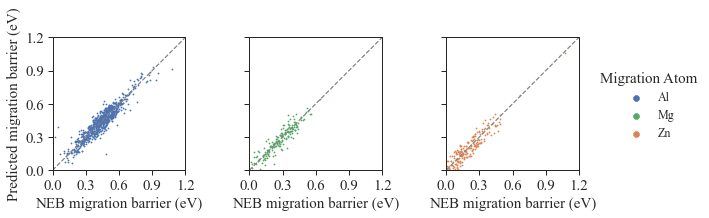

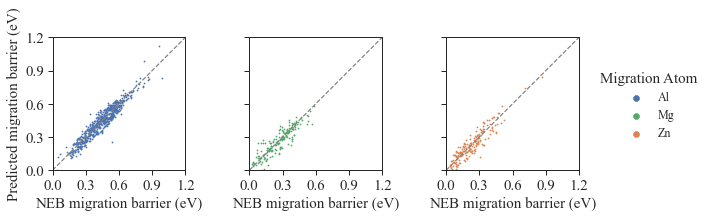

In [22]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted migration barrier (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB migration barrier (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['migration_barriers'], df_train['predicted_barrier'])))
##################################################################################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted migration barrier (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB migration barrier (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['migration_barriers'], df_test['predicted_barrier'])))

In [97]:
js_dist = {
    'Al' : {'transform_matrix' :  U_Al[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Al.tolist(), 'mean_y': mean_y_Al.tolist(), 'theta': theta_Al.tolist()},
    'Mg' : {'transform_matrix' :  U_Mg[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Mg.tolist(), 'mean_y': mean_y_Mg.tolist(), 'theta': theta_Mg.tolist()},
    'Zn' : {'transform_matrix' :  U_Zn[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Zn.tolist(), 'mean_y': mean_y_Zn.tolist(), 'theta': theta_Zn.tolist()},
    'Bond' : {'theta' : theta.tolist()}}
with open('kmc_parameters.json', 'w') as outfile:
    json.dump(js_dist, outfile)